# Version
* python 3.10.4
* NumPy 1.23.1
* matplotlib 3.5.2

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Implementation

## Newton Method

In [34]:
def newton(f, Df, x0, epsilon, max_iter):
    '''Approximate solution of f(x)=0 by Newton's method.
    
    Parameters
    -----------
    f : function
        Function for which we are searching for a solutoin f(x)=0.
    Df : function
        Derivative of f(x).
    x0 : number
        Initial guess for a solution f(x)=0.
    epsilon : number 
        Stopping criteria is abs(f(x)) < epsilon. 
    max_iter : integer
        Maximum number of iterations of Newton's method.
    h : stepsize
    Returns
    -------------
    xn : number
        Implement Newton's method: compute the linear approximation
        of f(x) at xn and find x intercept by the formula
            x = xn -f(xn)/Df(xn)
        Continue until abs(f(xn)) < epsilon and return xn.
        If Df(xn) == 0, return None. If the number of iterations
        exceeds max_iter, then return None.
    ---------
    '''
    
    xn = x0
    for n in range(0, max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            # print("Found solution after", n, "iterations.")
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            # print("Zero derivative. No solution found.")
            return None
        
        xn -= fxn/Dfxn
    # print("Exceed maximum iterations. No solution found.")
    return None

## Euler Method

In [35]:
def euler_method(f, t0, tN, y0, h):
    '''
    f = numerical problem
    g = exact solution
    t0 = left
    tN = right
    y0 = initial condition
    h = step size
    '''
    N = int((tN - t0)/h)
    grid = np.linspace(t0, tN, N+1)
    ygrid = np.zeros_like(grid)
    ygrid[0] = y0
    iter = np.arange(0, N+1)
    for i in iter:
        try:
            slope = f(grid[i], ygrid[i])
            ygrid[i+1] = ygrid[i] + slope * h
        except:
            break
    return grid, ygrid


## Backward Euler Method

In [36]:
def backward_euler(f, t0, tN, y0, h):
    '''
    f = numerical problem
    g = exact solution
    t0 = left
    tN = right
    y0 = initial condition
    h = step size
    '''
    N = int((tN - t0)/h)
    grid = np.linspace(t0, tN, N+1)
    ygrid = np.zeros_like(grid)
    ygrid[0] = y0
    iter = np.arange(0, N+1)
    for i in range(0, iter.size-1):
        u = lambda x: x - 6*h*(x-x**2) - ygrid[i]
        up = lambda x: 1 - 6*h*(1-2*x)
        y_n1 = newton(u, up, ygrid[i]+1e3, 1e-9, 1000)
        ygrid[i+1] = y_n1
    
    return grid, ygrid


# Problem 1

\begin{cases}
    y^{\prime} = 6y - 6y^{2} &\text{for} & 0\leq t \leq 20\\
    y \left(0\right) = 1/2
\end{cases}
$$\text{Exact solution} \, y\left( t \right) = \frac{e^{6t}}{e^{6t}+1}$$

In [51]:
f = lambda t, y: 6*y - 6*y**2
g = lambda t: np.exp(6*t)/(np.exp(6*t)+1)

grid, eulergrid = euler_method(f, 0, 20, 0.5, 0.5)
_, backgrid = backward_euler(f, 0, 20, 0.5, 0.5)
exact = g(grid)

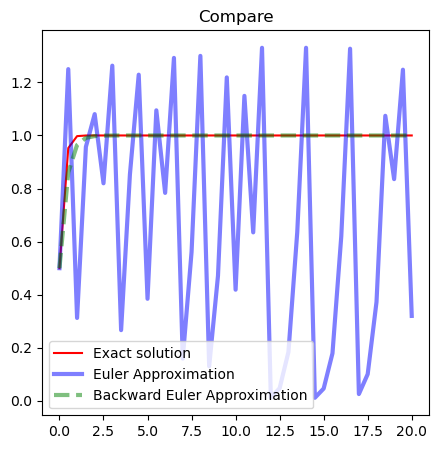

In [57]:
plt.figure(figsize=(5,5))
plt.title("Compare")
plt.plot(grid, exact, label="Exact solution", c="r")
plt.plot(grid, eulergrid, 'b-', label="Euler Approximation", lw=3, alpha=0.5)
plt.plot(grid, backgrid,'g--', label="Backward Euler Approximation", lw=3, alpha=0.5)
plt.legend()
plt.show()




